In [13]:
using Plots
# plotlyjs()
gr()

using Permittivity

using PhysicalConstants.CODATA2018: ε_0
using Unitful: ustrip

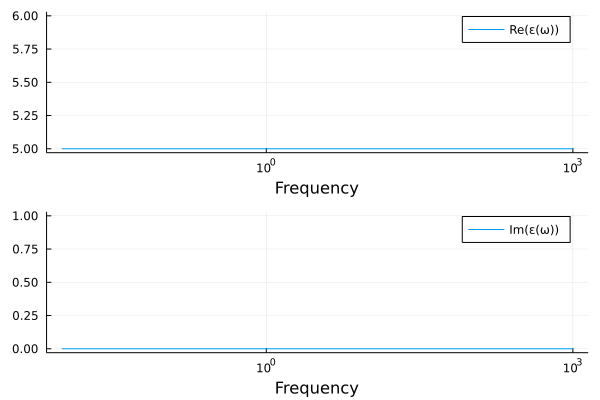

In [14]:
omega = exp10.(-2:.1:3)
eps_inf = 5. 

m = DielectricConstant(eps_inf)
ε = m.(omega)

plot(omega, [real(ε) imag(ε)], label=["Re(ε(ω))" "Im(ε(ω))"], xlabel="Frequency", layout=(2, 1), xaxis=:log10)

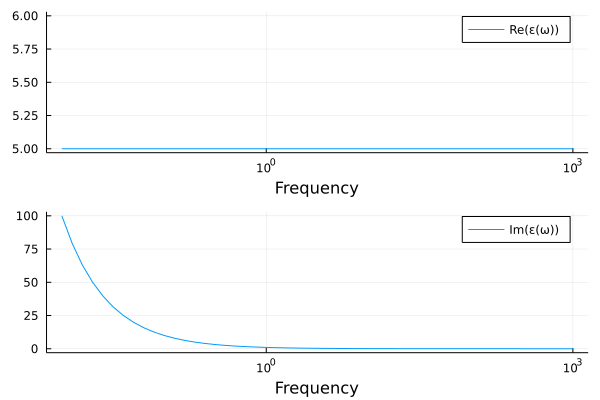

In [15]:
omega = exp10.(-2:.1:3)
eps_inf = 5. 
sigma = 1. * ustrip(ε_0)

m = DielectricModel(eps_inf, sigma)
ε = m.(omega)

plot(omega, [real(ε) imag(ε)], label=["Re(ε(ω))" "Im(ε(ω))"], xlabel="Frequency", layout=(2, 1), xaxis=:log10)

In [16]:
@doc DebyeModel

```
DebyeModel(eps_s, eps_inf, tau)
```

The Debye relaxation is the dielectric relaxation response of an ideal, noninteracting population of dipoles to an alternating external electric field. It can also describes the relaxation of atomic vibrations.

$$
\varepsilon (\omega) = \varepsilon_\infty  + \frac{\varepsilon_s - \varepsilon_\infty}{1 + j \omega \tau},
$$

where

  * $\varepsilon_s$ is a static (low frequency) dielectric permittivity,
  * $\varepsilon_\infty$ is permittivity at high frequency limit (optical permittivity),
  * $\tau = \frac{1}{\omega_r}$ is the characteristic relaxation time,
  * $\omega_r$ is relaxation frequency.

Separating into the real part $\varepsilon'$ and the imaginary part $\varepsilon''$ of the complex dielectric permittivity yields:

$$
\begin{align*}
    \varepsilon' &= \varepsilon_\infty + \frac{\varepsilon_s - \varepsilon_\infty}{1 + \omega^2 \tau^2} \\
    \varepsilon'' &= \frac{(\varepsilon_s - \varepsilon_\infty) \omega \tau}{1 + \omega^2 \tau^2}
\end{align*}
$$

# Example

```julia-repl
using Plots # hide

eps_s = 10.
eps_inf = 5.
tau = 1.

omega = exp10.(-2:.1:3)

m = DebyeModel(eps_s, eps_inf, tau)
ε = m.(omega)

plot(omega, [real(ε) imag(ε)], label=["Re(ε(ω))" "Im(ε(ω))"], xlabel="Frequency", layout=(2, 1), xaxis=:log10);
```


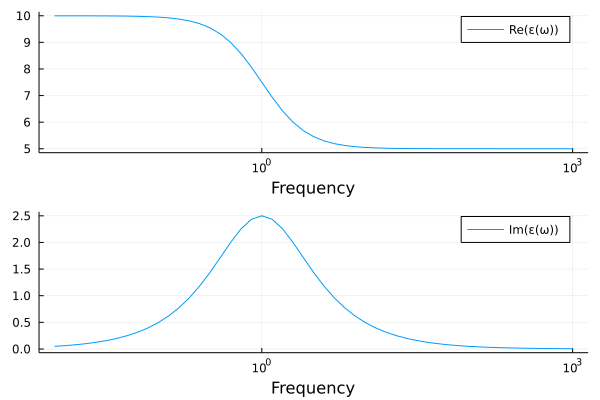

In [17]:
omega = exp10.(-2:.1:3)
eps_s = 10.
eps_inf = 5.
tau = 1.

m = DebyeModel(eps_s, eps_inf, tau)
ε = m.(omega)

plot(omega, [real(ε) imag(ε)], label=["Re(ε(ω))" "Im(ε(ω))"], xlabel="Frequency", layout=(2, 1), xaxis=:log10)

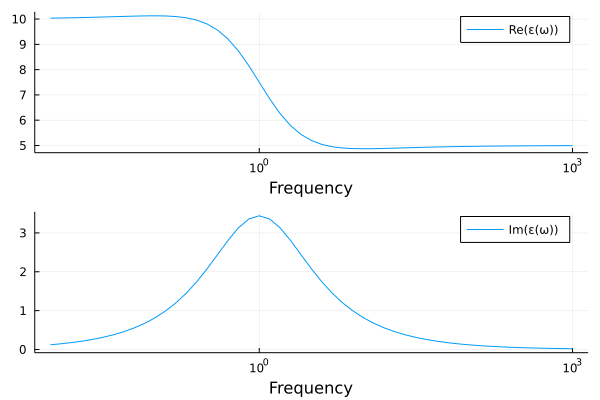

In [18]:
omega = exp10.(-2:.1:3)
eps_s = 10.
eps_inf = 5.
tau = 1.
alpha = 0.8

m = ColeColeModel(eps_s, eps_inf, tau, alpha)
ε = m.(omega)

plot(omega, [real(ε) imag(ε)], label=["Re(ε(ω))" "Im(ε(ω))"], xlabel="Frequency", layout=(2, 1), xaxis=:log10)

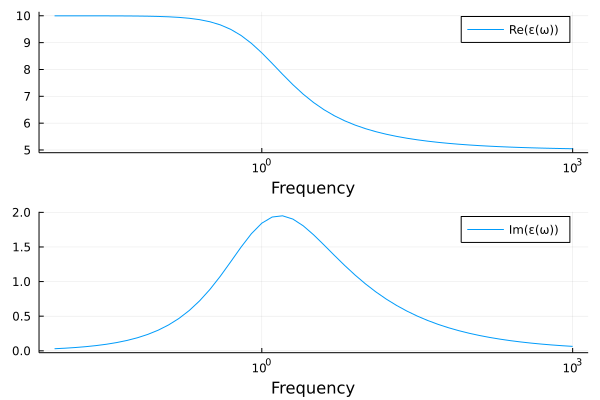

In [19]:
omega = exp10.(-2:.1:3)
eps_s = 10.
eps_inf = 5.
tau = 1.
beta = 0.6

m = ColeDavidson(eps_s, eps_inf, tau, beta)
ε = m.(omega)

plot(omega, [real(ε) imag(ε)], label=["Re(ε(ω))" "Im(ε(ω))"], xlabel="Frequency", layout=(2, 1), xaxis=:log10)

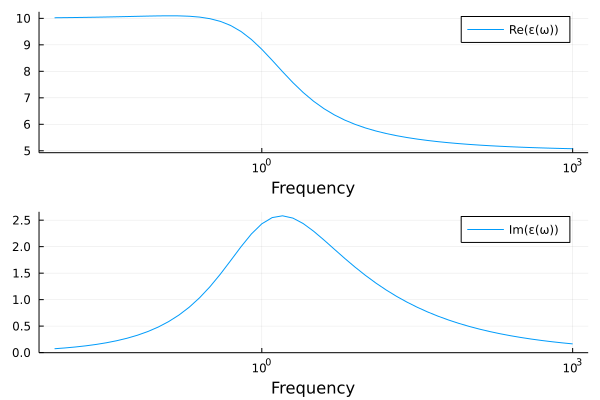

In [20]:
omega = exp10.(-2:.1:3)
eps_s = 10.
eps_inf = 5.
tau = 1.
alpha = .8
beta = .6

m = HavriliakNegamiModel(eps_s, eps_inf, tau, alpha, beta)
ε = m.(omega)

plot(omega, [real(ε) imag(ε)], label=["Re(ε(ω))" "Im(ε(ω))"], xlabel="Frequency", layout=(2, 1), xaxis=:log10)

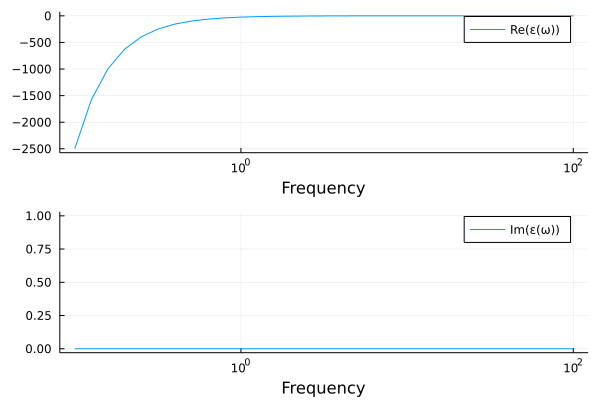

In [21]:
omega_p = 5.

omega = exp10.(-1:.1:2)

m = FreeElectronPlasmaModel(omega_p)
ε = m.(omega)

plot(omega, [real(ε) imag(ε)], label=["Re(ε(ω))" "Im(ε(ω))"], xlabel="Frequency", layout=(2, 1), xaxis=:log10)

Permittivity.eps_s(m) = -20.0 + Inf*im
(real(ε))[1] = -19.752475247524757
Permittivity.eps_inf(m) = 5.0
(real(ε))[end] = 4.997500249975002
Permittivity.realroot(m) = 2.0


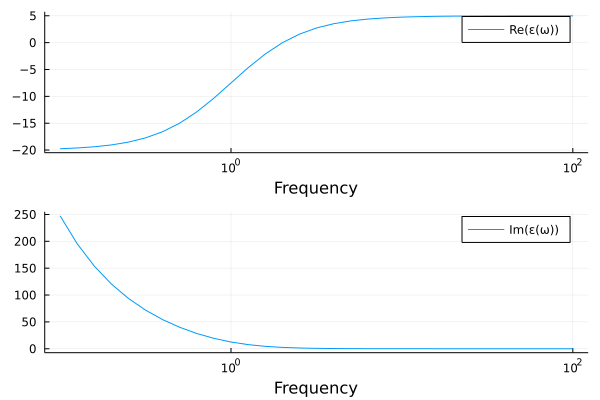

In [22]:
omega = exp10.(-1:.1:2)
eps_inf = 5.
omega_p = 5.
gamma = 1.

m = DrudeModel(eps_inf, omega_p, gamma)
ε = m.(omega)

@show Permittivity.eps_s(m) real(ε)[1]
@show Permittivity.eps_inf(m) real(ε)[end]
@show Permittivity.realroot(m) 

plot(omega, [real(ε) imag(ε)], label=["Re(ε(ω))" "Im(ε(ω))"], xlabel="Frequency", layout=(2, 1), xaxis=:log10)

Permittivity.eps_s(m) = 10.0
(real(ε))[1] = 10.0376552004885
Permittivity.eps_inf(m) = 5.0
(real(ε))[end] = 4.9994999624984375
Permittivity.peak(m) = 10.0
maximum(imag(ε)) = 10.146838701621535


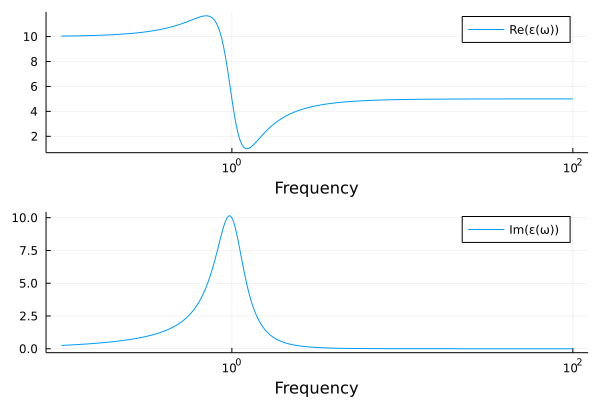

In [23]:
eps_s = 10.
eps_inf = 5.
omega_0 = 1.
gamma = .5

omega = exp10.(-1:.01:2)

m = LorentzModel(eps_s, eps_inf, omega_0, gamma)
ε = m.(omega)

@show Permittivity.eps_s(m) real(ε)[1]
@show Permittivity.eps_inf(m) real(ε)[end]
@show Permittivity.peak(m) maximum(imag(ε))

plot(omega, [real(ε) imag(ε)], label=["Re(ε(ω))" "Im(ε(ω))"], xlabel="Frequency", layout=(2, 1), xaxis=:log10)

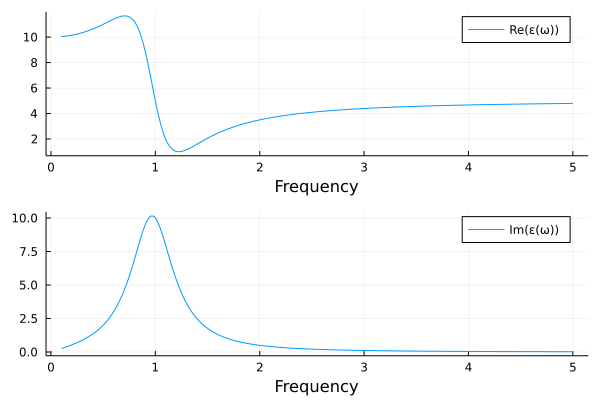

In [24]:
omega = 0.1:.01:5

m = LorentzModel(eps_s, eps_inf, omega_0, gamma)
ε = m.(omega)

plot(omega, [real(ε) imag(ε)], label=["Re(ε(ω))" "Im(ε(ω))"], xlabel="Frequency", layout=(2, 1))
